# Assignment 4 - K Means Clustering

In [4]:
#Importing the required APIs 

import pandas as pd
import random
import numpy as np
import math
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

%matplotlib inline

In [5]:
#Setting Maximum displayed rows and columns and Maximum display width and height

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', 199)

#Loaded data of Iris.csv is stored as Iris_df
#index_col is used to initialise Id column as the index

Iris_df = pd.read_csv("Iris.csv", index_col="Id")

#Loading done



## Checking for duplicated records

We are going to use the duplicated() function to check for duplicate records. This function searches from top down and shows true for any record that has a duplicate above it.

In [6]:
#Duplicate Check using .duplicated()

print(Iris_df.duplicated())

# All rows where boolean value is true signify duplicate records

Id
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35      True
36     False
37     False
38      True
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False
77     Fa

In [7]:
# Print Head as a check
print(len(Iris_df))
print(Iris_df.head())
print()

# Checking for Mean values
print(Iris_df.describe())


150
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.3

## Zero Check and Resolution

In [8]:
# Selecting columns that we don't want to be zero
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# print(columns)

for x in columns:
    Iris_df[x] = Iris_df[x].replace(0, np.NAN)
    mean = int(Iris_df[x].mean(skipna=True))
    Iris_df[x] = Iris_df[x].replace(np.NAN, mean)


# Checking for Mean values - no change indicates no zero values
print(Iris_df.describe())


       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


# Using Scikit Learn 

## Scaling
The requirement is to use standard scalar for normalization.


In [620]:
# Splitting the data 
features = Iris_df.iloc[:, 0:4]         #   All features except target feature - X
target = Iris_df.iloc[:,4:5]              #   Only Target feature - y

# Personal Observation - Only using Petal length data
# Splitting the data 
features1 = Iris_df.iloc[:, 2:4]         #   All features except target feature - X
features2 = Iris_df.iloc[:, 0:2]

# X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0, test_size=0.2, train_size=0.8)

# print(len(X_train))
# print(len(X_test))
# print(len(y_train))
# print(len(X_test))


In [335]:
# Scaling the data

sc_X = StandardScaler()

X_train = sc_X.fit_transform(features)
# X_test = sc_X.transform(X_test)

print(X_train);

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

## Model

In [336]:
# Taking 3 as number of clusters since we know that the data is segregated into 3 different classes
# init = k-means++ initializes centroids using k-means++ method 
km = KMeans(
    n_clusters=3, init='k-means++',
    n_init=10, max_iter=300
)

y_train = km.fit_predict(X_train)

print(y_train)
print(target)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
             Species
Id                  
1        Iris-setosa
2        Iris-setosa
3        Iris-setosa
4        Iris-setosa
5        Iris-setosa
6        Iris-setosa
7        Iris-setosa
8        Iris-setosa
9        Iris-setosa
10       Iris-setosa
11       Iris-setosa
12       Iris-setosa
13       Iris-setosa
14       Iris-setosa
15       Iris-setosa
16       Iris-setosa
17       Iris-setosa
18       Iris-setosa
19       Iris-setosa
20       Iris-setosa
21       Iris-setosa
22       Iris-setosa
23       Iris-setosa
24       Iris-setosa
25       Iris-setosa
26       Iris-setosa
27       Iris-setosa
28       Iris-setosa
29       Iris-setosa
30       Iris-setosa
31       Iris-setosa
3

## Elbow Method and Squared Sum Vs Number of Clusters Plot

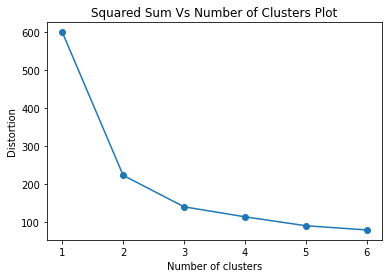

In [337]:
# calculate Squared Sum for a range of number of cluster
sse = []
for i in range(1, 7):
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X_train)
    sse.append(km.inertia_)

# plot
plt.plot(range(1, 7), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Squared Sum Vs Number of Clusters Plot')
plt.show()

<p>From the graph it is visible that 3 is the ideal number of clusters according to elbow method</p>

## Personal Observation - Only using Petal Length and Width

### Petal Length

In [622]:
# Scaling the data

sc_X = StandardScaler()

X_train = sc_X.fit_transform(features1)
# X_test = sc_X.transform(X_test)

# print(X_train)

In [627]:
km = KMeans(
    n_clusters=3, init='k-means++',
    n_init=10, max_iter=300
)

y_train = km.fit_predict(X_train)

print(y_train)
# print(target)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [639]:
p = pd.DataFrame(X_train);

p.index.name = "Id"

x = p.iloc[:,0:1]
y = p.iloc[:,1:2]

w = km.cluster_centers_

# print (w)
# w[2][0]

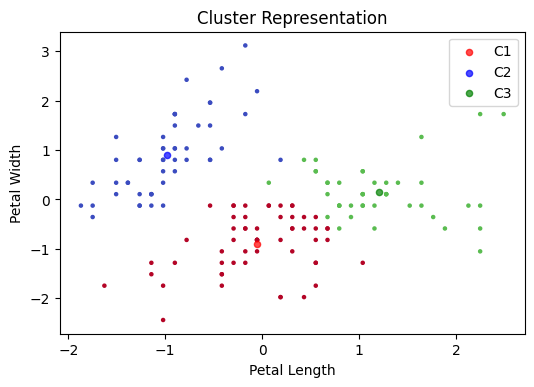

In [640]:
# Scatter depiction
plt.figure(dpi=100)
# x = [60,99,66,44,43,61,13,6,17,61,84,20,69,81,87,101,20,45,68,103,107,46,64,8,93,90,104,71,2]
# y1 = [53,99,54,74,114,108,81,5,56,18,17,118,76,56,77,73,92,77,10,71,71,41,118,120,82,87,94,87,84]
# y2 = [109,84,83,13,13,120,115,5,59,35,63,103,29,6,76,29,62,37,108,11,36,97,26,72,44,46,12,83,3]
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#5abc50' if x == 2 else '#b40426', y_train))

plt.scatter(x, y, color=colors, s=5)
plt.scatter(w[0][0], w[0][1], color='red' , label='C1', s=20, alpha=0.7)
plt.scatter(w[1][0], w[1][1], color='blue' , label='C2', s=20, alpha=0.7)
plt.scatter(w[2][0], w[2][1], color='green' , label='C3', s=20, alpha=0.7)
# plt.scatter(x, y2, color='r', label='red')
# plt.axvline(61, color='green', linestyle="dashed")
plt.title("Cluster Representation")
plt.xlabel("Petal Length")
plt.ylabel('Petal Width')
plt.legend()
plt.show()

### Sepal Length

In [630]:
# Scaling the data

sc_X = StandardScaler()

X_train = sc_X.fit_transform(features2)
# X_test = sc_X.transform(X_test)

# print(X_train)

In [631]:
km = KMeans(
    n_clusters=3, init='k-means++',
    n_init=10, max_iter=300
)

y_train = km.fit_predict(X_train)

print(y_train)
# print(target)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 0 2 2 2 0 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [632]:
p = pd.DataFrame(X_train);

p.index.name = "Id"

x = p.iloc[:,0:1]
y = p.iloc[:,1:2]

w = km.cluster_centers_

print (w)
w[2][0]

[[-0.04825457 -0.89224112]
 [-0.97822861  0.89321545]
 [ 1.20144049  0.14411561]]


1.201440489026933

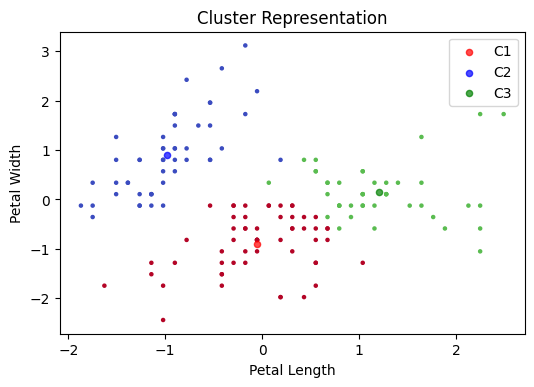

In [633]:
# Scatter depiction
plt.figure(dpi=100)
# x = [60,99,66,44,43,61,13,6,17,61,84,20,69,81,87,101,20,45,68,103,107,46,64,8,93,90,104,71,2]
# y1 = [53,99,54,74,114,108,81,5,56,18,17,118,76,56,77,73,92,77,10,71,71,41,118,120,82,87,94,87,84]
# y2 = [109,84,83,13,13,120,115,5,59,35,63,103,29,6,76,29,62,37,108,11,36,97,26,72,44,46,12,83,3]
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#5abc50' if x == 2 else '#b40426', y_train))

plt.scatter(x, y, color=colors, s=5)
plt.scatter(w[0][0], w[0][1], color='red' , label='C1', s=20, alpha=0.7)
plt.scatter(w[1][0], w[1][1], color='blue' , label='C2', s=20, alpha=0.7)
plt.scatter(w[2][0], w[2][1], color='green' , label='C3', s=20, alpha=0.7)
# plt.scatter(x, y2, color='r', label='red')
# plt.axvline(61, color='green', linestyle="dashed")
plt.title("Cluster Representation")
plt.xlabel("Petal Length")
plt.ylabel('Petal Width')
plt.legend()
plt.show()

# Implementation from Scratch

In [343]:
# Splitting the data 
features = Iris_df.iloc[:, 0:4]         #   All features except target feature - X
target = Iris_df.iloc[:,4:5]              #   Only Target feature - y

# # Personal Observation - Only using Petal length data
# # Splitting the data 
# features1 = Iris_df.iloc[:, 2:4]         #   All features except target feature - X

# X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0, test_size=0.2, train_size=0.8)

# print(len(X_train))
# print(len(X_test))
# print(len(y_train))
# print(len(X_test))
# print(target)

## Normalize Function

In [344]:
# Normalizing 
# Fitting is done only using training data
# The test data is only transformed

def Normalize(X_train) :
    df_min = X_train.min(axis = 0)
    df_max = X_train.max(axis = 0)

    for column in X_train:
        # print(column)
        # print()
        for index in X_train.index :
            X_train[column][index] = (X_train[column][index] - df_min[column]) / (df_max[column] - df_min[column])
            # print (X_train[column][index])

    return(X_train)


In [406]:
X_train = Normalize(features)

## Squared Sum

In [407]:
# Function defining Euclidean Distance Calculation and returns squared sum
def EuclideanDistance(value1, value2) :

    # print("In the function")

    i = 0
    sum = 0
    
    if(len(value1) == len(value2)) :
        # print("In the if condition")

        while(i < len(value1)) :
            # print("In the loop")
            # print(len(value1))

            sum += (value1[i] - value2[i]) * (value1[i] - value2[i])
            i += 1
    else:
        print("Incorrect Arguments")

    # print(sum)
    # sq_sum = math.sqrt(sum)

    return sum

## K-means ++

In [408]:
# K means ++
def KMeans_plus_plus_init(features, number_of_clusters = 3):

    k = random.randint(0, len(features))
    centroid = []
    c = []
    centroid.append(np.array(features.iloc[k:k+1, :]))

    i = 1

    while(i < number_of_clusters) :
        Distance = pd.DataFrame(index=features.index, columns={'Distance'})

        for index, row in X_train.iterrows():
            for j in centroid :
                if(math.isnan(Distance['Distance'][index])) :
                    Distance['Distance'][index] = EuclideanDistance(row, j[0])
                    continue

                Distance['Distance'][index] = min(Distance['Distance'][index], EuclideanDistance(row, j[0]))
                # if Distance['Distance'][index] == math.nan :
                #     Distance['Distance'][index] = EuclideanDistance(row, j[0])
                #     print(Distance['Distance'][index])
                # elif EuclideanDistance(row, j[0]) < Distance['Distance'][index] :
                #     Distance['Distance'][index] = EuclideanDistance(row, j[0])
                #     print(Distance['Distance'][index])

            Distance = Distance.sort_values(by=['Distance'], ascending=False)

        centroid.append(np.array(features.iloc[Distance.index[0]:Distance.index[0]+1, :]))
        # print(Distance.head(5))    
        Distance = Distance.head(0)
        i += 1

        
    for j in centroid :
        c.append(j[0])

    return c
    

    # a = np.array(features.iloc[0:1, :])
    # b = np.array(features.iloc[0:1, :])

    # sum = EuclideanDistance(a[0], b[0])
    # sum



## Model From Scratch

In [586]:
def KMeans_from_scratch(X_train, target, k = 3, max_iter = 200):

    y_train = pd.DataFrame(index=X_train.index, columns={'ClusterNumber'})

    inertia = 0

    centroid = KMeans_plus_plus_init(X_train, k)
    prev_centroid = centroid.copy()

    column = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species', 'ClusterNumber', 'SquaredDistance']
    clusters = pd.DataFrame(index=X_train.index, columns=column)
    # cluster = pd.DataFrame(index=X_train.index, columns={'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm, ClusterNumber, SquaredDistance'})

    m = 0
    while(m < max_iter) :
        m += 1

        prev_centroid = centroid.copy()
        # cluster.drop()
        # clusters.clear()

        # clusters.clear()
        # cluster = pd.DataFrame(index=X_train.index, columns={'ClusterNumber, SquaredDistance'})

        # print(y_train.head(3))
        for index, row in X_train.iterrows():
            # print(np.array(row.T))
            distance = 100.0
            i = 0
            for j in centroid :
                if(EuclideanDistance(row, j) < distance) :
                    distance = EuclideanDistance(row, j)
                    clusters.loc[index, 'SquaredDistance'] = distance
                    # cluster['ClusterNumber'][index] = i
                    y_train['ClusterNumber'][index] = i

                i += 1

        i = 0
        # print(y_train)

        while (i < len(centroid)) :
            centroid[i] = np.array(X_train[y_train.ClusterNumber == i].mean())
            i += 1
            # clusters.append(X_train[y_train[y_train.ClusterNumber == i].index])
            # prev_centroid = centroid
            # centroid = np.array(cluster[cluster.ClusterNumber == i].mean().T)
        
        # print(clusters)
        # print(prev_centroid)
        # print()
        # print(centroid)
        # print(prev_centroid, centroid)
        i = 0
        while (i < len(centroid)) :
            if((prev_centroid[i] == centroid[i]).all()) :
                break
            i += 1
            
        if(i < len(centroid)):
            break
        m += 1
    
    for index, row in X_train.iterrows():
        clusters.loc[index, 'SepalWidthCm'] = row.SepalWidthCm
        clusters.loc[index, 'SepalLengthCm'] = row.SepalLengthCm
        clusters.loc[index, 'PetalLengthCm'] = row.PetalLengthCm
        clusters.loc[index, 'PetalWidthCm'] = row.PetalWidthCm
        clusters.loc[index, 'ClusterNumber'] = y_train.loc[index, 'ClusterNumber']
        clusters.loc[index, 'Species'] = target.loc[index, 'Species']

        # clusters.loc[index, 'SquaredDistance'] = y_train.loc[index, 'ClusterNumber']

    inertia = clusters['SquaredDistance'].sum()

    return y_train, clusters, centroid, m, inertia

In [587]:
y_test, cluster, centroid, num_iter, inertia = KMeans_from_scratch(X_train = X_train, target=target, k = 3)

## Elbow Method

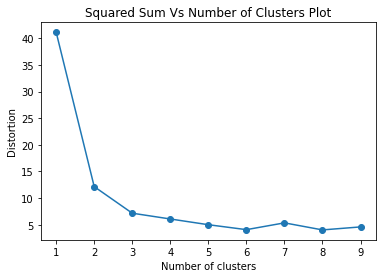

In [588]:
# calculate Squared Sum for a range of number of cluster
sse = []
for i in range(1, 10):
    y_test, cluster, centroid, num_iter, inertia = KMeans_from_scratch(X_train = X_train, target=target, k = i)
    # km.fit(X_train)
    sse.append(inertia)

# plot
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Squared Sum Vs Number of Clusters Plot')
plt.show()

<p>It is visible that the ideal number of clusters is 3</p>

# Model Evaluation

In [595]:
# Doing for k =3
y_test, cluster, centroid, num_iter, inertia = KMeans_from_scratch(X_train = X_train, target=target, k = 3)

## Accuracy Function

In [571]:
def Accuracy(cluster, k):
    i = 0
    accuracy = 0
    
    while i < k :
        cluster1 = cluster[cluster.ClusterNumber == i]
        accuracy += max(len(cluster1[cluster1.Species == 'Iris-setosa']), max(len(cluster1[cluster1.Species == 'Iris-versicolor']), len(cluster1[cluster1.Species == 'Iris-virginica'])))
        i += 1

    print(accuracy)
    accuracy /= len(cluster)
    return accuracy



## Total Accuracy Calculation and Segregated Records

### Total Accuracy

In [617]:
accuracy = Accuracy(cluster, 3)
accuracy * 100

133


88.66666666666667

Here accuracy is calculated by counting all the records in a cluster belonging to a majority class divided by the total number of records. Doing so we can see that 88% of the records or 133 records were segregated into a clusters where the majority species was their respective species.

### Segregated Data for K = 3

In [598]:
#Displaying the final segregated records
cluster

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,ClusterNumber,SquaredDistance
Id,,,,,,,
1,0.222222,0.625,0.067797,0.041667,Iris-setosa,0,0.002303
2,0.166667,0.416667,0.067797,0.041667,Iris-setosa,0,0.031655
3,0.111111,0.5,0.050847,0.041667,Iris-setosa,0,0.016584
4,0.083333,0.458333,0.084746,0.041667,Iris-setosa,0,0.030648
5,0.194444,0.666667,0.067797,0.041667,Iris-setosa,0,0.006207
6,0.305556,0.791667,0.118644,0.125,Iris-setosa,0,0.058137
7,0.083333,0.583333,0.067797,0.083333,Iris-setosa,0,0.013437
8,0.194444,0.583333,0.084746,0.041667,Iris-setosa,0,0.000432
9,0.027778,0.375,0.067797,0.041667,Iris-setosa,0,0.075374


### Cluster Sizes for k = 3

In [600]:
# Cluster sizes
print(len(cluster[cluster.ClusterNumber == 0]), len(cluster[cluster.ClusterNumber == 1]), len(cluster[cluster.ClusterNumber == 2]))

50 67 33


### Individual Cluster Accuracies

In [613]:
# Cluster 1
cluster1 = cluster[cluster.ClusterNumber == 0]

c1 = max(len(cluster1[cluster1.Species == 'Iris-setosa']), max(len(cluster1[cluster1.Species == 'Iris-versicolor']), len(cluster1[cluster1.Species == 'Iris-virginica'])))

c1 / len(cluster1) * 100

100.0

In [614]:
# Cluster 2
cluster1 = cluster[cluster.ClusterNumber == 1]

c1 = max(len(cluster1[cluster1.Species == 'Iris-setosa']), max(len(cluster1[cluster1.Species == 'Iris-versicolor']), len(cluster1[cluster1.Species == 'Iris-virginica'])))

c1 / len(cluster1) * 100

74.6268656716418

In [616]:
# Cluster 3
cluster1 = cluster[cluster.ClusterNumber == 2]

c1 = max(len(cluster1[cluster1.Species == 'Iris-setosa']), max(len(cluster1[cluster1.Species == 'Iris-versicolor']), len(cluster1[cluster1.Species == 'Iris-virginica'])))

c1 / len(cluster1) * 100

100.0

# Summary

<p>My Implementation of the model takes in Normalized features with the target classes, number of iterations and number of clusters to return segregated data, centroid locations, cluster data for respective index, number of iterations done and the Sum of Squared distance from respective centroids.</p>
<p>Final accuracy was calculated by counting all the records in a cluster belonging to a majority class divided by the total number of records. Doing so we can see the records that were segregated into a clusters where the majority class was their respective class</p>
<p>I did try different number of clusters and as suggested from the elbow method, k = 3 gave the highest accuracy of 88 % for this particular dataset</p>
<p>An additional observation I made was that the accuracy drastically increased if we took only the petal length and petal width features into account. It suggests that the petal length and the petal width features have some overlap especially in the case of Iris-Veriscolor and Iris-virginica</p>